## Preprocessing

In [1]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(["EIN","NAME"], axis=1)

In [4]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type = application_df["APPLICATION_TYPE"].value_counts()
app_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
app_type.shape

(17,)

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type[app_type<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
Classification_type = application_df["CLASSIFICATION"].value_counts()
Classification_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
Classification_type.loc[Classification_type > 1]


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(Classification_type[Classification_type<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Determine the minimum values in the column "ASK_AMT".
application_df["ASK_AMT"].min()

5000

In [11]:
# Determine the maximum value in the column "ASK_AMT".
application_df["ASK_AMT"].max()

8597806340

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Define the number of bins
num_bins = 15  # Adjust the number of bins as needed

# Apply logarithmic transformation to the ASK_AMT column
application_df['Log_ASK_AMT'] = np.log(application_df['ASK_AMT'])

# Create bins for the log-transformed data
bins = pd.cut(application_df['Log_ASK_AMT'], bins=num_bins, labels=False)

# Assign the bin labels back to the original data
application_df['Log_Bin'] = bins

# View the result
print(application_df['Log_Bin'].value_counts())

0     26180
2      1913
3      1575
1      1432
4      1157
5       786
6       534
7       326
8       157
9       115
10       48
11       36
12       25
13       10
14        5
Name: Log_Bin, dtype: int64


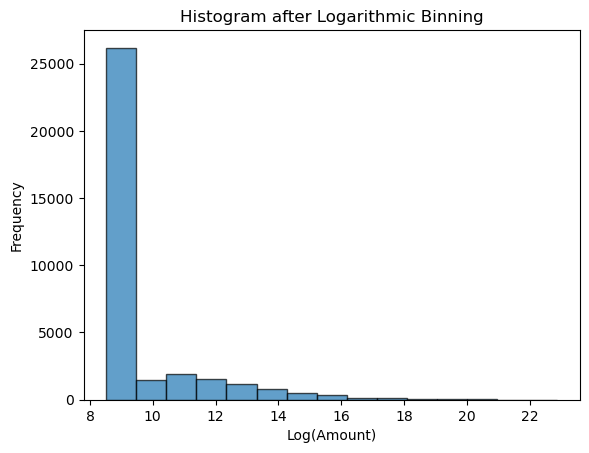

In [15]:
# Plot the histogram
plt.hist(application_df['Log_ASK_AMT'], bins=num_bins, edgecolor='k', alpha=0.7)
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')
plt.title('Histogram after Logarithmic Binning')
plt.grid(False)

# Show the plot
plt.show()

In [16]:
application_df.tail(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,Log_ASK_AMT,Log_Bin
34289,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,20197,1,9.913289,1
34290,T4,CompanySponsored,C3000,Preservation,Association,1,1-9999,N,5000,0,8.517193,0
34291,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,8.517193,0
34292,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,8.517193,0
34293,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,1,8.517193,0
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0,8.517193,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,8.517193,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0,8.517193,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1,8.517193,0
34298,T3,Independent,C1000,Preservation,Co-operative,1,1M-5M,N,36500179,0,17.412828,9


In [17]:
application_df.dtypes

APPLICATION_TYPE           object
AFFILIATION                object
CLASSIFICATION             object
USE_CASE                   object
ORGANIZATION               object
STATUS                      int64
INCOME_AMT                 object
SPECIAL_CONSIDERATIONS     object
ASK_AMT                     int64
IS_SUCCESSFUL               int64
Log_ASK_AMT               float64
Log_Bin                     int64
dtype: object

In [18]:
application_df =application_df.drop(['Log_Bin', "ASK_AMT"], axis=1)

In [19]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df)
application_dummies.head()

,STATUS,IS_SUCCESSFUL,Log_ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,8.517193,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,11.595335,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,8.517193,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,8.808668,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,1,11.867729,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

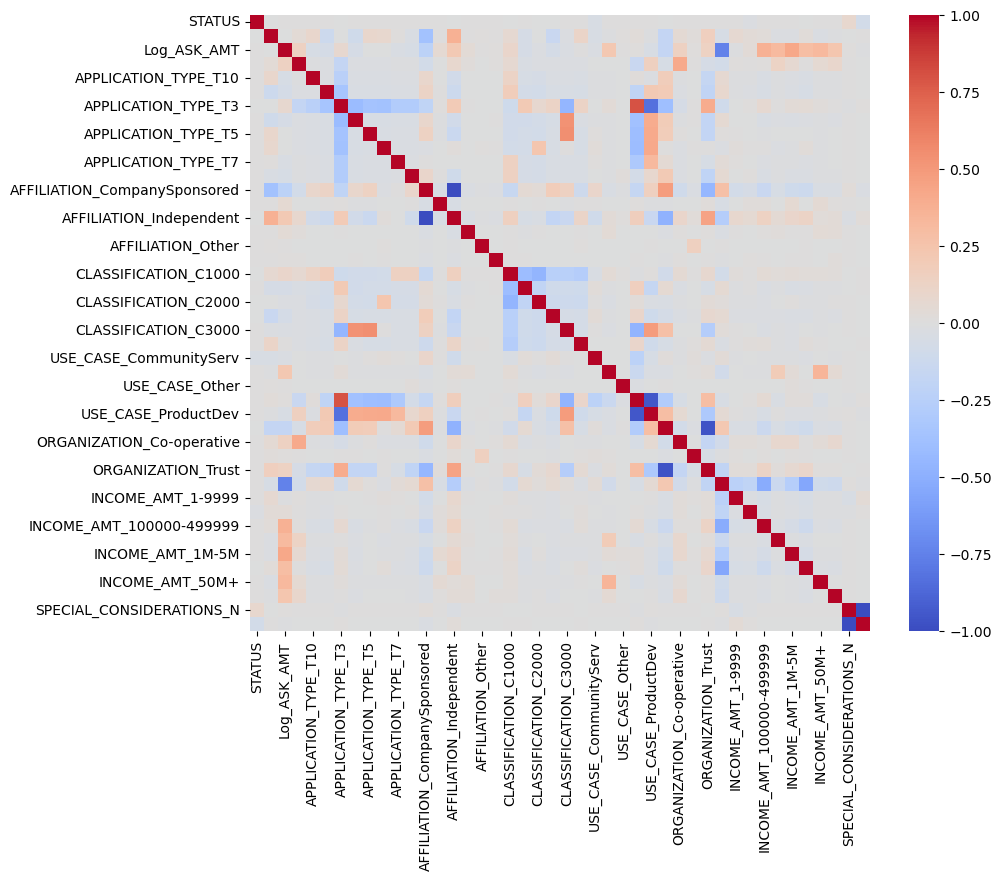

In [21]:
# Calculate correlation matrix
correlation_matrix = application_dummies.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()

In [22]:
# Split our preprocessed data into our features and target arrays
y=application_dummies.IS_SUCCESSFUL.values.reshape(-1, 1)
X=application_dummies.copy()
X.drop("IS_SUCCESSFUL", axis=1, inplace=True)
X.head()


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [24]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [25]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [26]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [27]:
# Model Evaluation: Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2792,1201
Actual 1,1248,3334


Accuracy Score : 0.7144023323615161
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      3993
           1       0.74      0.73      0.73      4582

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575



**FEATURE IMPORTANCE**

In [29]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
least_important = sorted(zip(rf_model.feature_importances_, X.columns), reverse= False)
importances_sorted

[(0.4025060236330303, 'Log_ASK_AMT'),
 (0.13562165737807066, 'AFFILIATION_CompanySponsored'),
 (0.1197046232964481, 'AFFILIATION_Independent'),
 (0.027704146358701984, 'APPLICATION_TYPE_T5'),
 (0.02695495581501403, 'ORGANIZATION_Association'),
 (0.023611730087496285, 'APPLICATION_TYPE_T10'),
 (0.020882404242600926, 'ORGANIZATION_Trust'),
 (0.020159082767717013, 'CLASSIFICATION_C2100'),
 (0.019024402569724257, 'CLASSIFICATION_Other'),
 (0.01829061656844982, 'APPLICATION_TYPE_T4'),
 (0.017852772497885784, 'CLASSIFICATION_C2000'),
 (0.017257152719457422, 'APPLICATION_TYPE_T19'),
 (0.014432337686934148, 'APPLICATION_TYPE_T3'),
 (0.013646460921472701, 'CLASSIFICATION_C1000'),
 (0.012651632868359604, 'APPLICATION_TYPE_T6'),
 (0.011579020898517256, 'USE_CASE_ProductDev'),
 (0.010380207384458932, 'USE_CASE_Preservation'),
 (0.009421028537515507, 'INCOME_AMT_0'),
 (0.009134991459962915, 'CLASSIFICATION_C1200'),
 (0.00879245337944511, 'CLASSIFICATION_C3000'),
 (0.007235415475803876, 'INCOME_AMT_

In [30]:
importances_sorted[:20]

[(0.4025060236330303, 'Log_ASK_AMT'),
 (0.13562165737807066, 'AFFILIATION_CompanySponsored'),
 (0.1197046232964481, 'AFFILIATION_Independent'),
 (0.027704146358701984, 'APPLICATION_TYPE_T5'),
 (0.02695495581501403, 'ORGANIZATION_Association'),
 (0.023611730087496285, 'APPLICATION_TYPE_T10'),
 (0.020882404242600926, 'ORGANIZATION_Trust'),
 (0.020159082767717013, 'CLASSIFICATION_C2100'),
 (0.019024402569724257, 'CLASSIFICATION_Other'),
 (0.01829061656844982, 'APPLICATION_TYPE_T4'),
 (0.017852772497885784, 'CLASSIFICATION_C2000'),
 (0.017257152719457422, 'APPLICATION_TYPE_T19'),
 (0.014432337686934148, 'APPLICATION_TYPE_T3'),
 (0.013646460921472701, 'CLASSIFICATION_C1000'),
 (0.012651632868359604, 'APPLICATION_TYPE_T6'),
 (0.011579020898517256, 'USE_CASE_ProductDev'),
 (0.010380207384458932, 'USE_CASE_Preservation'),
 (0.009421028537515507, 'INCOME_AMT_0'),
 (0.009134991459962915, 'CLASSIFICATION_C1200'),
 (0.00879245337944511, 'CLASSIFICATION_C3000')]

In [31]:
importances_df = pd.DataFrame(importances_sorted[:20])


<Axes: title={'center': 'Features Importances'}, ylabel='1'>

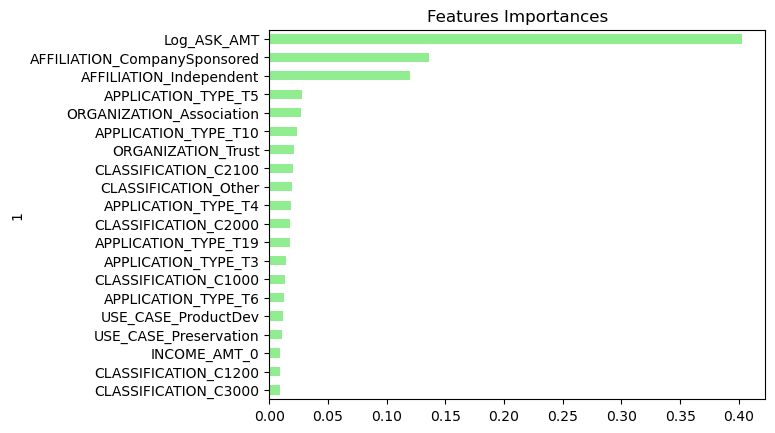

In [32]:
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [33]:
least_important_df = pd.DataFrame(least_important[:20])
least_important_df

,0,1
0,0.000066,AFFILIATION_Other
1,0.000071,USE_CASE_Other
2,0.000202,STATUS
3,0.000275,AFFILIATION_Regional
4,0.000505,ORGANIZATION_Corporation
5,0.000511,SPECIAL_CONSIDERATIONS_N
6,0.000529,SPECIAL_CONSIDERATIONS_Y
7,0.000633,AFFILIATION_National
8,0.001238,AFFILIATION_Family/Parent
9,0.001377,USE_CASE_Heathcare
